In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

In [2]:
!pip install mlxtend

  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.1
    Uninstalling scikit-learn-1.0.1:
      Successfully uninstalled scikit-learn-1.0.1


In [4]:
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data', 
                   names=['buying', 'maint', 'doors', 'person', 'lug_boot', 'safety', 'Class'])

In [5]:
data.head()

,buying,maint,doors,person,lug_boot,safety,Class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [6]:
data.describe()

,buying,maint,doors,person,lug_boot,safety,Class
count,1728,1728,1728,1728,1728,1728,1728
unique,4,4,4,3,3,3,4
top,vhigh,vhigh,2,2,small,low,unacc
freq,432,432,432,576,576,576,1210


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   person    1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   Class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [8]:
X = data.drop(['Class'], axis = 1)
y = data['Class']

In [10]:
X

,buying,maint,doors,person,lug_boot,safety
0,3,3,0,0,2,1
1,3,3,0,0,2,2
2,3,3,0,0,2,0
3,3,3,0,0,1,1
4,3,3,0,0,1,2
...,...,...,...,...,...,...
1723,1,1,3,2,1,2
1724,1,1,3,2,1,0
1725,1,1,3,2,0,1
1726,1,1,3,2,0,2


In [11]:
y

0       unacc
1       unacc
2       unacc
3       unacc
4       unacc
        ...  
1723     good
1724    vgood
1725    unacc
1726     good
1727    vgood
Name: Class, Length: 1728, dtype: object

In [12]:
lbl = LabelEncoder()

X['buying'] = lbl.fit_transform(X.buying)
X['maint'] = lbl.fit_transform(X.maint)
X['doors'] = lbl.fit_transform(X.doors)
X['person'] = lbl.fit_transform(X.person)
X['lug_boot'] = lbl.fit_transform(X.lug_boot)
X['safety'] = lbl.fit_transform(X.safety)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=2)

In [14]:
model = DecisionTreeClassifier( criterion= 'gini', max_depth= 3, min_samples_split= 10)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, min_samples_split=10)

In [15]:
y_pred = model.predict(X_test)

In [16]:
confusion_matrix(y_test, y_pred)

array([[ 98,   0,  16,   0],
       [ 23,   0,   0,   0],
       [ 67,   0, 300,   0],
       [ 15,   0,   0,   0]], dtype=int64)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         acc       0.48      0.86      0.62       114
        good       0.00      0.00      0.00        23
       unacc       0.95      0.82      0.88       367
       vgood       0.00      0.00      0.00        15

    accuracy                           0.77       519
   macro avg       0.36      0.42      0.37       519
weighted avg       0.78      0.77      0.76       519



C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # different than its default value. If we are computing only f-score
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # different than its default value. If we are computing only f-score
C:\Users\Asus\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  # different than its default value. If we are computing only f-score


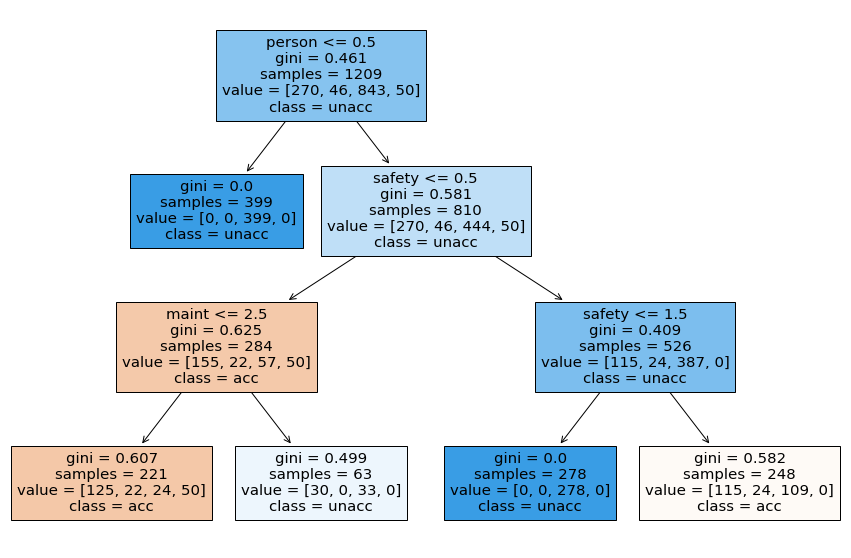

In [23]:
from sklearn import tree
fig = plt.figure(figsize=(15,10))
_ = tree.plot_tree(model, feature_names=data.columns[:-1], class_names= model.classes_, filled=True)